### Customer Churn Analysis - Telco Customers 

What is Customer Churn?

Customer churn is one of the most important metrics for a growing business to evaluate especially in telecome industry.
The number relates to the hard truth about its customer retention and it signifies the costs more to acquire new customers than it does to retain existing customers. In fact, an increase in customer retention of just 5% can create at least a 25% increase in profit. This is because returning customers will likely spend 67% more on company's products and services.
As a result,company can spend less on the operating costs of having to acquire new customers. we don't need to spend time and money on convincing an existing customer to select the company over competitors because they've already made that decision.

How to Reduce Customer Churn?
1. Focus our attention on our best customers.
2. Analyze churn as it occurs.
3. Show the customers that we care.

We are going to do analysis on Customer Churn for Telco customers and evaluate the best model to extract the feature attributes to 

In [1]:
"""
Make the imports of python packages needed
"""
# Import all the tools we need

# Regular EDA ( Exploratory data analysis ) and plotting libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
#loading data file
import warnings
warnings.filterwarnings("ignore")

# Models from SCikit -Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# we want our plots to appear inside the notebook
%matplotlib inline

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
          

In [2]:
df = pd.read_csv('C:/Users/13095/Machinelearning/Sample_Project/data/Telco-Customers.csv')
df.shape

(7043, 21)

### Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

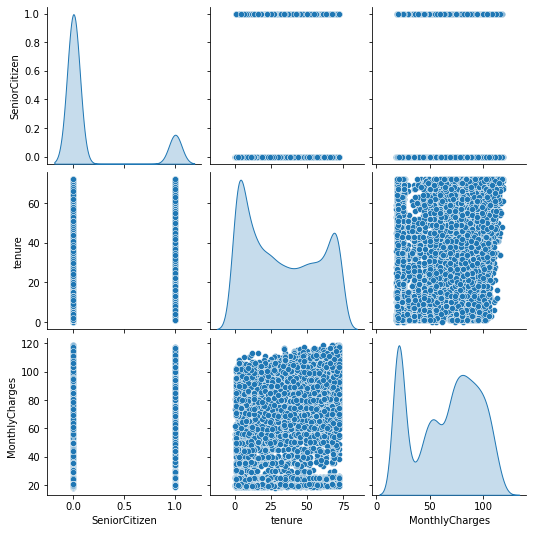

In [5]:
sns.pairplot(data=df,diag_kind='kde')

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["TotalCharges"],y=df["tenure"])

In [ ]:
# Are there any missing values?
df.isna().sum()

In [ ]:
df["Churn"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [ ]:
df.info()

Here  TotalCharges is showing as object but it is actually "Float" -  implies existence of missing values
 tc=pd.to_numeric(df0.TotalCharges) #causes ValueError: Unable to parse string " "

In [ ]:
# convert " " to 0
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')
df['TotalCharges']= pd.to_numeric(df.TotalCharges)


In [ ]:
# Finding the datatypes of columns
type_cols = df.select_dtypes(object)
type_cols

### Convering Categorical features into Binary values

In [ ]:
# Convert Yes/No into Binary values (0 ,1)
#'No internet service' can also be set to zero

Nkeys=[k for k in list(type_cols.keys()) if type_cols[k][0] in ['Yes','No']]
for k in Nkeys:
    df[k].replace(('Yes', 'No','No internet service'), (1, 0, 0), inplace=True)

In [ ]:
# Categorical features here are gender,muliple lines,Internet service,contract,payment method
# categorical to one-hot Encoder

New_df=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])

# Converting  Gender and MutilpleLines into Binary values (using replace function)
gender = New_df['gender'].replace(['Female','Male'],[0,1],inplace=True)
MultipleLines = New_df['MultipleLines'].replace(['No phone service','No','Yes'],[0,0,1],inplace =True)



In [ ]:
New_df.head()

In [ ]:
New_df.describe()

In [ ]:
#View the number and proportion of lost users
plt.figure(figsize=(6,6))
plt.pie(New_df['Churn'].value_counts(),labels=New_df['Churn'].value_counts().index,autopct='%0.2f%%',explode=(0.1,0))
plt.title('Churn(Yes/No) Ratio')
plt.show()

In [ ]:
# Create a plot of crosstab
pd.crosstab(New_df.Churn,New_df.gender).plot(kind ="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Customer Churn with respect to Gender")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Churn")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = New_df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot() 
    plt.legend(fontsize=10)
    plt.title('Churn(Yes/No) Ratio as {0}'.format(feature))
    plt.figure(figsize=(9, 4.5))
    plt.show()

barplot_percentages("MultipleLines", orient='h')
barplot_percentages("SeniorCitizen")
barplot_percentages("gender")

In [ ]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

In [ ]:
ax = sns.catplot(x="Contract", y="TotalCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

In [ ]:
# Make a correlation Matrix
New_df.corr()

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = New_df.corr()
fig,ax = plt.subplots(figsize =(25,25))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top-0.5)

In [ ]:
Num_df = df.iloc[:,[1,5,6,8,11,13,15,16,17,18,20]]

In [ ]:
Num_df.head()

In [ ]:
Num_df["Churn"].value_counts()

In [ ]:
Num_df["gender"] = Num_df["gender"].apply(lambda x: 1 if x=='Female' else 0)
Num_df["PhoneService"] = Num_df["PhoneService"].apply(lambda x: 1 if x=='Yes' else 0)
Num_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
Num_df['Churn'].replace(to_replace='No',  value=0, inplace=True)

Num_df["PaperlessBilling"] = Num_df["PaperlessBilling"].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
Num_df = pd.get_dummies(Num_df,columns=['InternetService',
       'DeviceProtection', 
       'StreamingTV',
       'Contract',
       'PaymentMethod',],drop_first=False)

In [ ]:
Num_df.head()

In [ ]:
Num_df.info()


In [ ]:
y = Num_df["Churn"]
X = Num_df.drop(['Churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=100,shuffle=True)

In [ ]:
# Put models in a dictionary

models = { "Logistic Regression": LogisticRegression(),
            "Naive Bayes": GaussianNB(),
            "Stochastic Gradient": SGDClassifier(),
            "KNeighbors Classifier": KNeighborsClassifier(),
            "DecisionTree Classifier": DecisionTreeClassifier(),
            "RandomForest Classifier": RandomForestClassifier(),
            }
# Create a function to fit and score models

def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different SCikit-Learn machine learning models
    X_train : training data(no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seeed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test,y_test)
        isimler = model.__class__.__name__
        y_pred = model.predict(X_test)
        dogruluk = accuracy_score(y_test, y_pred)
        print("-"*28)
        print(isimler + ":" )
        print("Accuracy: {:.4%}".format(dogruluk))
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train= X_train,
                             X_test= X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Let's tune KNN
train_scores=[]
test_scores= [] 

# create a list of different values for n_nieghbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
plt.plot(neighbors,train_scores, label = "Train score")
plt.plot(neighbors,test_scores, label = "Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f" Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

In [ ]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C":np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

In [ ]:
# Check the best hyperparmaters
rs_log_reg.best_params_

In [ ]:
# Evaluate the grid search LogisticRegression model
rs_log_reg.score(X_test, y_test)

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend = False);

### Evaluting our tuned machine learning classifier, beyond accuracy
 * ROC curve and AUC score
 * Confusion matrix
 * Classification report
 * Precision
 * Recall
 * F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [ ]:
# Make predictions with tuned model
y_preds = rs_log_reg.predict(X_test)

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [ ]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_accuracy

In [ ]:
cv_accuracy = np.mean(cv_acc)
cv_accuracy

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0)

clf.fit(X_train,y_train)

### Different ways to plot the Decision Tree

In [ ]:
tree.plot_tree(clf)
plt.show()

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
#loading data file
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = None,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Customer_Churn_Prediction.png')
Image(graph.create_png())

In [ ]:
### Conclusion
